# Data Science Project 01: Analyze NYC-Flight data

# Domain: Airlines

In [243]:
#Import libraries

import numpy as np
import pandas as pd
import pandas_profiling as pp

import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

import plotly as pyt
from plotly.offline import iplot

%matplotlib inline

In [244]:
print(pd.__version__)
print(pp.__version__)

1.0.3
2.5.0


In [245]:
# Read data file
rawData = pd.read_csv("flight_data.csv")

In [246]:
# Number of rows
print(np.size(rawData, 0))
print(len(rawData))

336776
336776


In [247]:
# Get null data info
print(rawData.isnull().sum())

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64


In [248]:
#Dataset info
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [249]:
#Get mean, median, mode, std
rawData.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [250]:
rawData

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,30-09-2013 14:00
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,30-09-2013 22:00
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,30-09-2013 12:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,30-09-2013 11:00


In [251]:
rawData.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


In [252]:
rawData.tail(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,30-09-2013 14:00
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,30-09-2013 22:00
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,30-09-2013 12:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,30-09-2013 11:00
336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,3531,N839MQ,LGA,RDU,NaN,431,8,40,30-09-2013 08:00


In [253]:
#Display random sample
rawData.sample(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
67435,2013,11,13,1422.0,1400,22.0,1532.0,1507,25.0,US,2150,N945UW,LGA,BOS,48.0,184,14,0,13-11-2013 14:00
222006,2013,5,31,1847.0,1845,2.0,2120.0,2156,-36.0,DL,2391,N942DL,JFK,TPA,132.0,1005,18,45,31-05-2013 18:00
110828,2013,12,31,1138.0,1129,9.0,1354.0,1338,16.0,DL,2219,N952DL,LGA,MSP,164.0,1020,11,29,31-12-2013 11:00
51611,2013,10,27,1453.0,1500,-7.0,1744.0,1815,-31.0,AA,2297,N3GTAA,LGA,MIA,150.0,1096,15,0,27-10-2013 15:00
16291,2013,1,19,1542.0,1529,13.0,1741.0,1737,4.0,EV,4369,N18556,EWR,CVG,102.0,569,15,29,19-01-2013 15:00


In [254]:
# Process data,
#Clean dataset, Remove rows which has NA value for 'dep_time', 'dep_delay', 'arr_time', 'arr_delay'
processedData_dropedNA = rawData.dropna(axis = 0, how = 'any', subset = ['dep_time', 'dep_delay', 'arr_time', 'arr_delay'],  inplace=False)
processedData_dropedNA.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,327346.0,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000
mean,2013.0,6.564803,15.740825,1348.789883,1340.335098,12.555156,1501.908238,1532.788426,6.895377,1943.104501,150.686460,1048.371314,13.141010,26.234116
std,0.0,3.413444,8.777376,488.319979,467.413156,40.065688,532.888731,497.979124,44.633292,1621.523684,93.688305,735.908523,4.662063,19.295918
min,2013.0,1.000000,1.000000,1.000000,500.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,80.000000,5.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,905.000000,-5.000000,1104.000000,1122.000000,-17.000000,544.000000,82.000000,509.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1400.000000,1355.000000,-2.000000,1535.000000,1554.000000,-5.000000,1467.000000,129.000000,888.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1944.000000,14.000000,3412.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [255]:
print(np.size(processedData_dropedNA, 0))
print(len(processedData_dropedNA))

327346
327346


In [256]:
# Cross verify for any NA values
processedData_dropedNA.isnull().sum()

year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
dtype: int64

In [257]:
# Dispaly processed data info
processedData_dropedNA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327346 entries, 0 to 336769
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            327346 non-null  int64  
 1   month           327346 non-null  int64  
 2   day             327346 non-null  int64  
 3   dep_time        327346 non-null  float64
 4   sched_dep_time  327346 non-null  int64  
 5   dep_delay       327346 non-null  float64
 6   arr_time        327346 non-null  float64
 7   sched_arr_time  327346 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         327346 non-null  object 
 10  flight          327346 non-null  int64  
 11  tailnum         327346 non-null  object 
 12  origin          327346 non-null  object 
 13  dest            327346 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        327346 non-null  int64  
 16  hour            327346 non-null  int64  
 17  minute    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



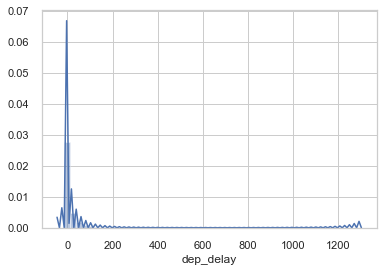

In [258]:
processedData_dropedNA['dep_delay'] = pd.to_numeric(processedData_dropedNA['dep_delay'], errors='coerce')
sns.distplot(processedData_dropedNA['dep_delay']);

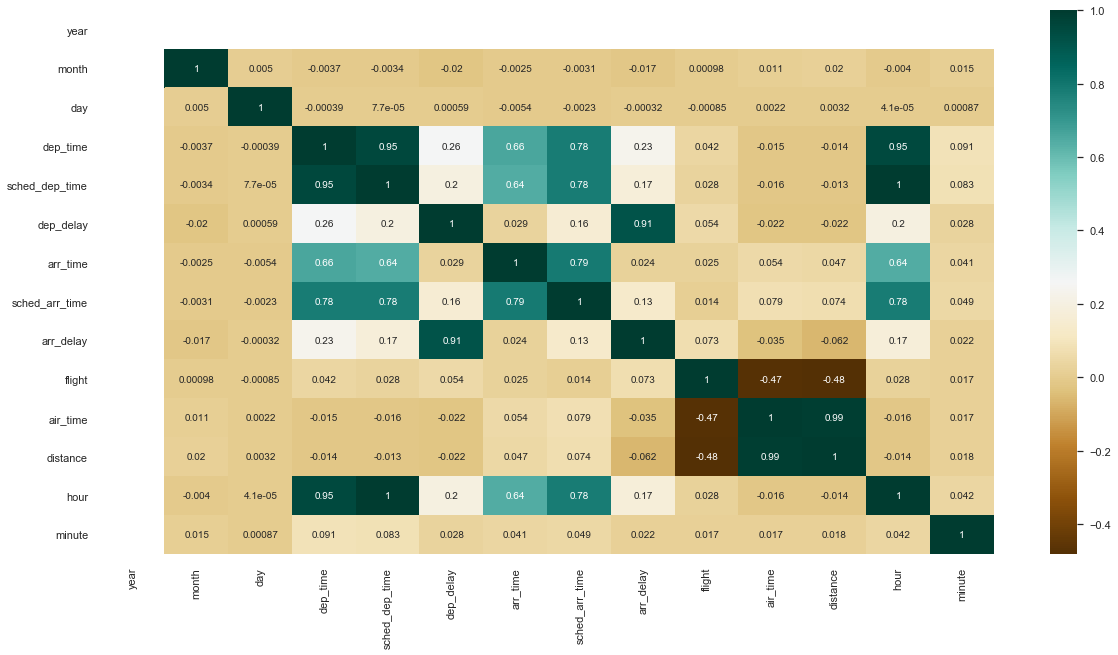

In [259]:
# Lets see correlation with heat map
plt.figure(figsize=(20,10))
c=processedData_dropedNA.corr()
sns.heatmap(c, cmap="BrBG", annot=True)

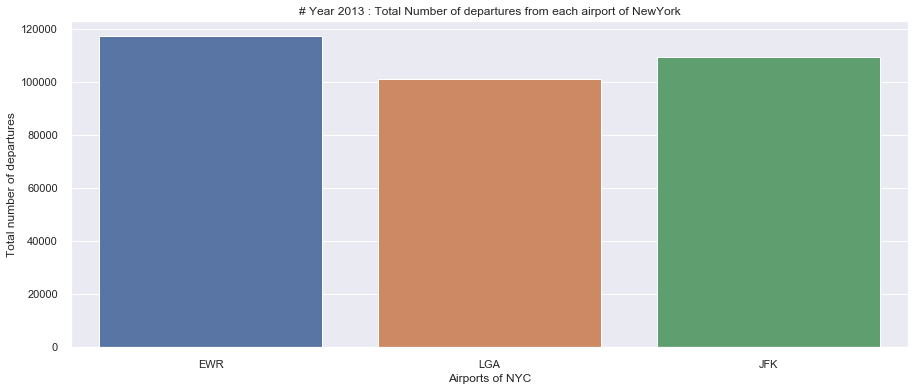

In [260]:
#Year 2013 : Total Number of departures from each airport of NewYork
%matplotlib inline
plt.figure(figsize=(15,6))
sns.set(style="darkgrid")
ax = sns.countplot(data=processedData_dropedNA, x='origin')
plt.title("# Year 2013 : Total Number of departures from each airport of NewYork");
plt.xlabel("Airports of NYC")
plt.ylabel("Total number of departures")
plt.show()

Text(0, 0.5, 'Total number of departures')

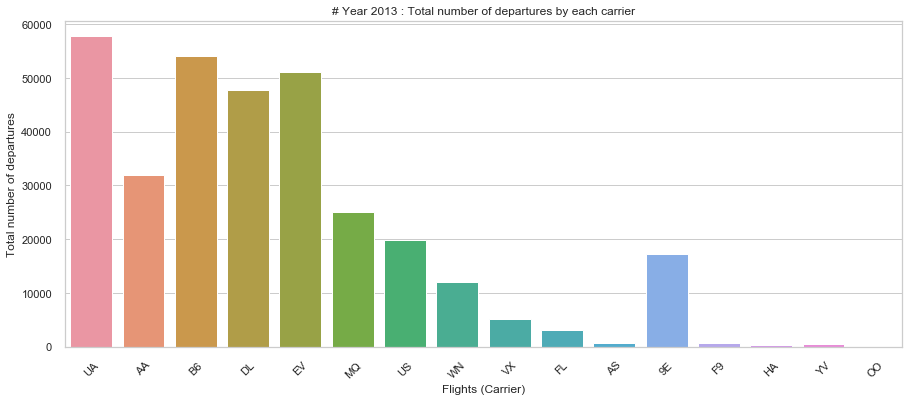

In [261]:
# Year 2013 : Total number of departures by each carrier
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.countplot(x= 'carrier', data=processedData_dropedNA)
plt.xticks(rotation=45)
plt.title("# Year 2013 : Total number of departures by each carrier")
plt.xlabel("Flights (Carrier)")
plt.ylabel("Total number of departures")

Text(0, 0.5, 'Total number of departures')

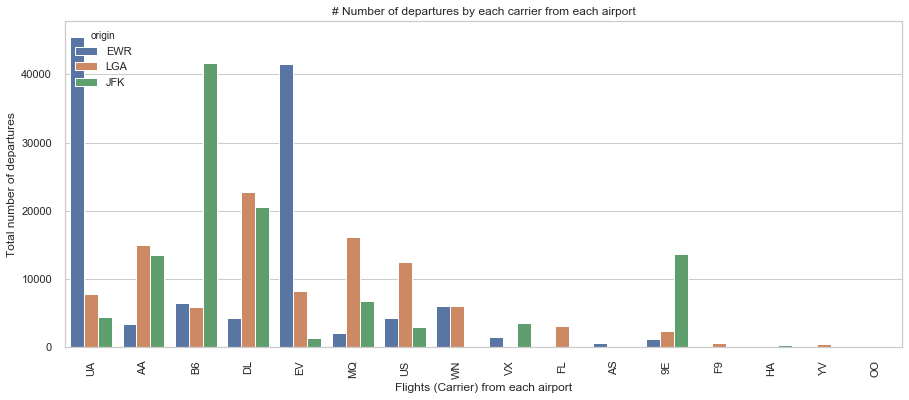

In [262]:
# Number of departures by each carrier from each airport
plt.figure(figsize=[15,6])
plt.xticks(rotation=90)
sns.countplot(processedData_dropedNA['carrier'],hue=processedData_dropedNA['origin'])
plt.title("# Number of departures by each carrier from each airport")
plt.xlabel("Flights (Carrier) from each airport")
plt.ylabel("Total number of departures")

Text(0, 0.5, 'Total number of delayed departures')

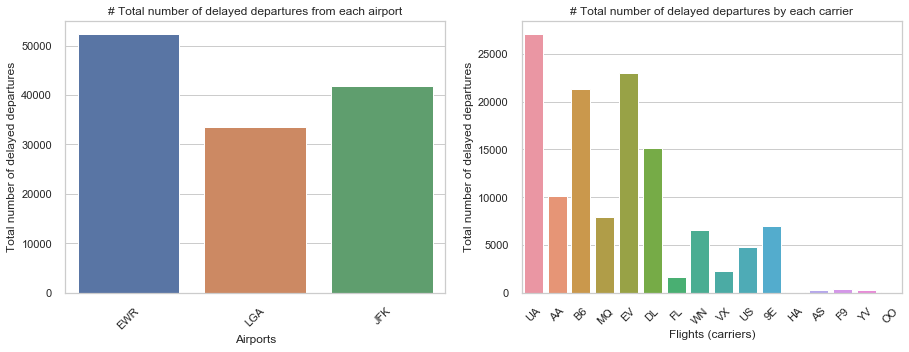

In [263]:
# Total number of delayed departures from each airport
# Total number of delayed departures by each carrier

plt.figure(figsize=(15,5))
plt.subplots_adjust(hspace = 0.3)

plt.subplot(121)
sns.set_style('whitegrid')
sns.countplot(x= 'origin', data=processedData_dropedNA[processedData_dropedNA['dep_delay'] > 0 ])
plt.xticks(rotation=45)
plt.title("# Total number of delayed departures from each airport")
plt.xlabel("Airports")
plt.ylabel("Total number of delayed departures")

plt.subplot(122)
sns.set_style('whitegrid')
sns.countplot(x= 'carrier', data=processedData_dropedNA[processedData_dropedNA['dep_delay'] > 0 ])
plt.xticks(rotation=45)
plt.title("# Total number of delayed departures by each carrier")
plt.xlabel("Flights (carriers)")
plt.ylabel("Total number of delayed departures")

Text(0, 0.5, 'Total number of early departures')

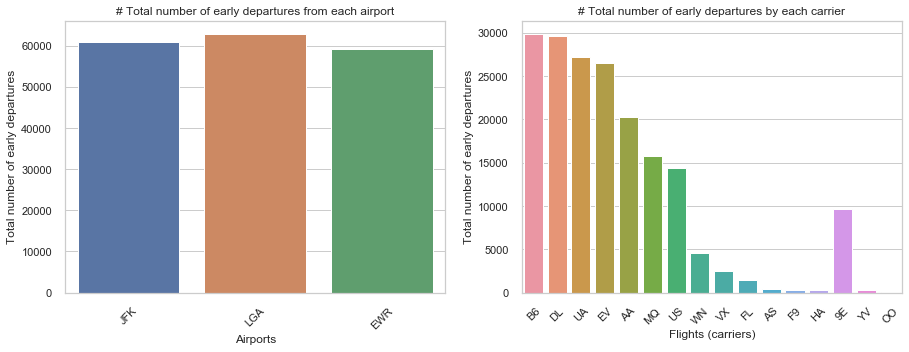

In [264]:
#Total number of early departures from each airport
#Total number of early departures by each carrier

plt.figure(figsize=(15,5))
plt.subplots_adjust(hspace = 0.3)

plt.subplot(121)
sns.set_style('whitegrid')
sns.countplot(x= 'origin', data=processedData_dropedNA[processedData_dropedNA['dep_delay'] < 0 ])
plt.xticks(rotation=45)
plt.title("# Total number of early departures from each airport")
plt.xlabel("Airports")
plt.ylabel("Total number of early departures")

plt.subplot(122)
sns.set_style('whitegrid')
sns.countplot(x= 'carrier', data=processedData_dropedNA[processedData_dropedNA['dep_delay'] < 0 ])
plt.xticks(rotation=45)
plt.title("# Total number of early departures by each carrier")
plt.xlabel("Flights (carriers)")
plt.ylabel("Total number of early departures")

Text(0, 0.5, 'Total number of on time departures')

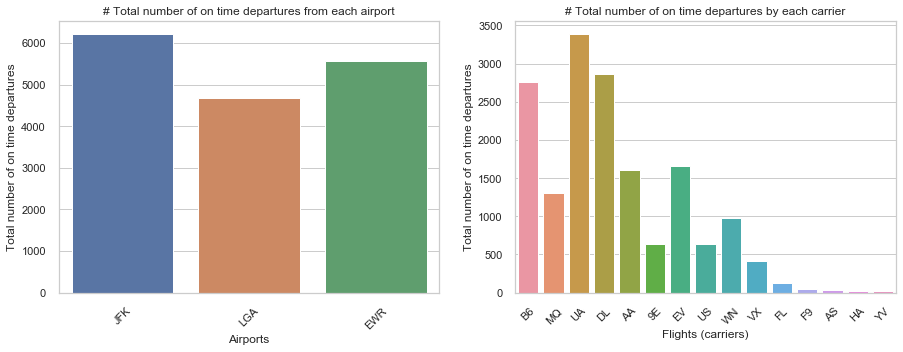

In [265]:
# Total number of on time departures from each airport
# Total number of on time departures by each carrier

plt.figure(figsize=(15,5))
plt.subplots_adjust(hspace = 0.3)

plt.subplot(121)
sns.set_style('whitegrid')
sns.countplot(x= 'origin', data=processedData_dropedNA[processedData_dropedNA['dep_delay'] == 0 ])
plt.xticks(rotation=45)
plt.title("# Total number of on time departures from each airport")
plt.xlabel("Airports")
plt.ylabel("Total number of on time departures")

plt.subplot(122)
sns.set_style('whitegrid')
sns.countplot(x= 'carrier', data=processedData_dropedNA[processedData_dropedNA['dep_delay'] == 0 ])
plt.xticks(rotation=45)
plt.title("# Total number of on time departures by each carrier")
plt.xlabel("Flights (carriers)")
plt.ylabel("Total number of on time departures")

In [266]:
# Verify the departure count of ontime/delayed/early departure's
print(len(processedData_dropedNA[processedData_dropedNA['dep_delay'] > 0 ])) 
print(len(processedData_dropedNA[processedData_dropedNA['dep_delay'] < 0 ])) 
print(len(processedData_dropedNA[processedData_dropedNA['dep_delay'] == 0 ])) 

127745
183135
16466


Text(0, 0.5, 'Total number of early departures')

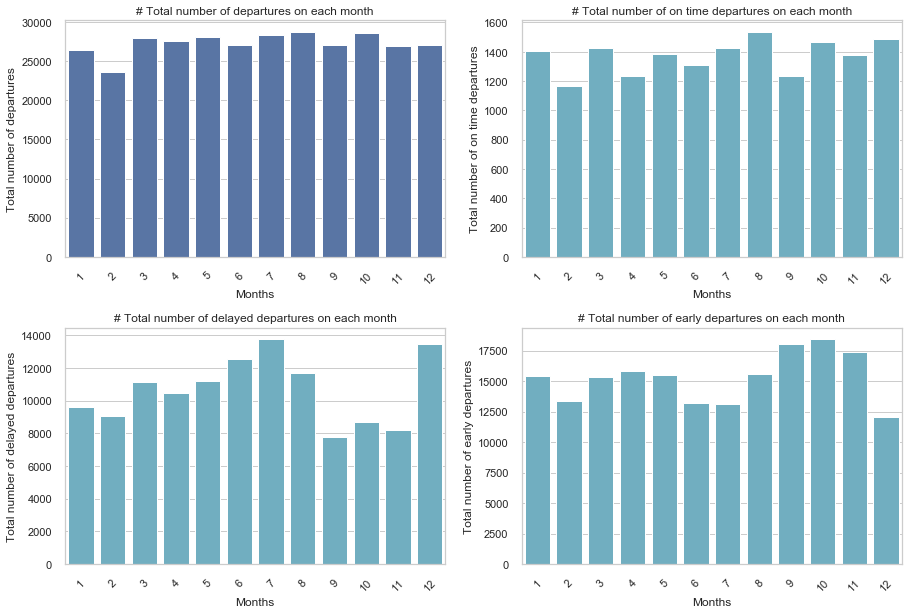

In [267]:
# Verify month wise data
# Is Season/Weather impacting….? 

plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace = 0.3)

plt.subplot(221)
sns.set_style('whitegrid')
sns.countplot(x= 'month', data=processedData_dropedNA,color='b')
plt.xticks(rotation=45)
plt.title("# Total number of departures on each month")
plt.xlabel("Months")
plt.ylabel("Total number of departures")

plt.subplot(222)
sns.set_style('whitegrid')
sns.countplot(x= 'month', data=processedData_dropedNA[processedData_dropedNA['dep_delay'] == 0 ], color='c')
plt.xticks(rotation=45)
plt.title("# Total number of on time departures on each month")
plt.xlabel("Months")
plt.ylabel("Total number of on time departures")

plt.subplot(223)
sns.set_style('whitegrid')
sns.countplot(x= 'month', data=processedData_dropedNA[processedData_dropedNA['dep_delay'] > 0 ], color='c')
plt.xticks(rotation=45)
plt.title("# Total number of delayed departures on each month")
plt.xlabel("Months")
plt.ylabel("Total number of delayed departures")

plt.subplot(224)
sns.set_style('whitegrid')
sns.countplot(x= 'month', data=processedData_dropedNA[processedData_dropedNA['dep_delay'] < 0 ], color='c')
plt.xticks(rotation=45)
plt.title("# Total number of early departures on each month")
plt.xlabel("Months")
plt.ylabel("Total number of early departures")

In [268]:
# Get list of carriers
print(processedData_dropedNA['carrier'].unique())

['UA' 'AA' 'B6' 'DL' 'EV' 'MQ' 'US' 'WN' 'VX' 'FL' 'AS' '9E' 'F9' 'HA'
 'YV' 'OO']


Text(0, 0.5, 'Number of early/delayed arrivals')

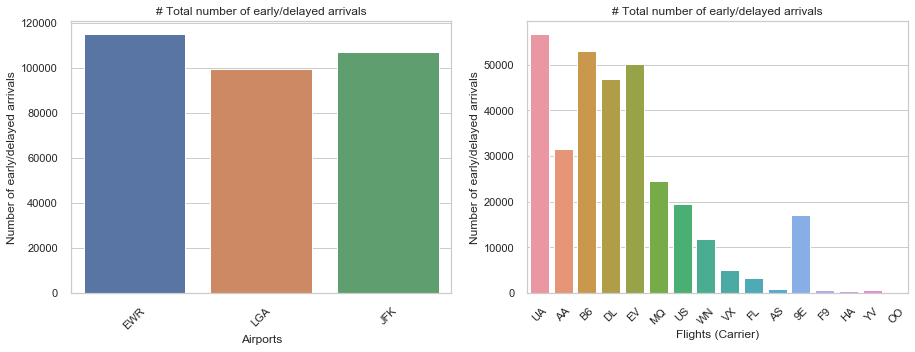

In [269]:
# Arrival delay analysis
plt.figure(figsize=(15,5))
plt.subplots_adjust(hspace = 0.3)

plt.subplot(121)
sns.set_style('whitegrid')
sns.countplot(x= 'origin', data=processedData_dropedNA[processedData_dropedNA['arr_delay'] != 0 ])
plt.xticks(rotation=45)
plt.title("# Total number of early/delayed arrivals")
plt.xlabel("Airports")
plt.ylabel("Number of early/delayed arrivals") 

plt.subplot(122)
sns.set_style('whitegrid')
sns.countplot(x= 'carrier', data=processedData_dropedNA[processedData_dropedNA['arr_delay'] != 0 ])
plt.xticks(rotation=45)
plt.title("# Total number of early/delayed arrivals")
plt.xlabel("Flights (Carrier)")
plt.ylabel("Number of early/delayed arrivals") 

In [270]:
# Arrival delay count
print(len(processedData_dropedNA[processedData_dropedNA['arr_delay'] != 0 ]))

321937


In [271]:
# Prepare data for % analysis

f1 = (processedData_dropedNA['dep_delay'] != 0)
f2 = (processedData_dropedNA['arr_delay'] != 0)
DepArrDelay = processedData_dropedNA[f1 & f2]
print("Number of flights which caused both departure and arrival deplay")
print(len(DepArrDelay))

f1 = (processedData_dropedNA['dep_delay'] == 0)
f2 = (processedData_dropedNA['arr_delay'] == 0)
NoDepArrDelay = processedData_dropedNA[f1 & f2]
print("Number of flight which is arrived and departured on time ")
print(len(NoDepArrDelay))

f1 = (processedData_dropedNA['dep_delay'] != 0)
f2 = (processedData_dropedNA['arr_delay'] == 0)
OnlyDepDelay = processedData_dropedNA[f1 & f2]
print("Number of flights which caused only departure deplay")
print(len(OnlyDepDelay))

f1 = (processedData_dropedNA['dep_delay'] == 0)
f2 = (processedData_dropedNA['arr_delay'] != 0)
OnlyArrDelay = processedData_dropedNA[f1 & f2]
print("Number of flights which caused only arrival deplay")
print(len(OnlyArrDelay))

Number of flights which caused both departure and arrival deplay
305818
Number of flight which is arrived and departured on time 
347
Number of flights which caused only departure deplay
5062
Number of flights which caused only arrival deplay
16119


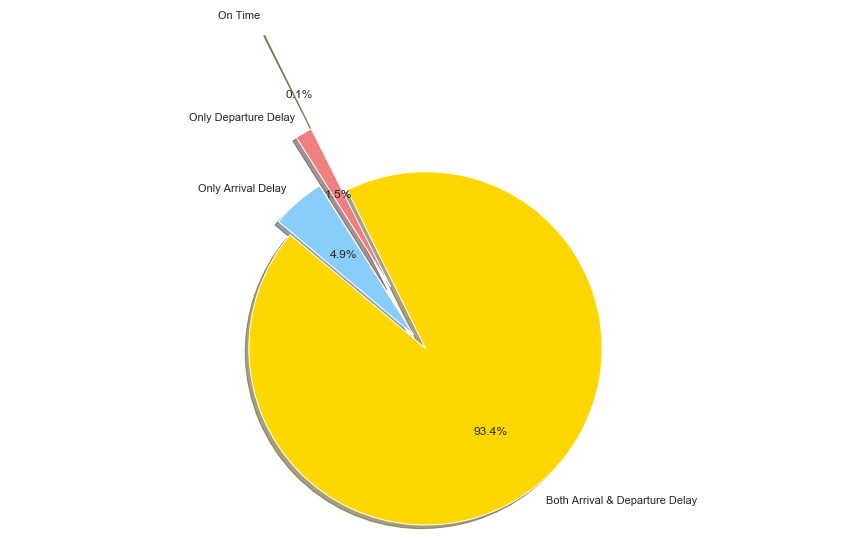

In [272]:
# % of contribution analysis
import matplotlib.pyplot as plt

# Data to plot
labels = 'Both Arrival & Departure Delay', 'On Time', 'Only Departure Delay', 'Only Arrival Delay'
sizes = [305818, 347, 5062, 16119]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 1, 0.4, 0.1)  # explode 1st slice

plt.figure(figsize=(15,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

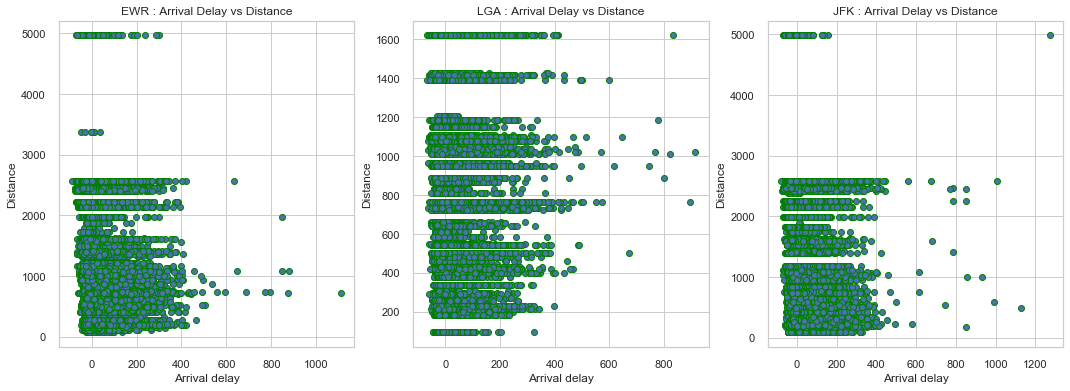

In [273]:
# Arrival Delay vs Distance
f1 = (processedData_dropedNA['origin'] == 'EWR')
EWRData = processedData_dropedNA[f1]

f2 = (processedData_dropedNA['origin'] == 'LGA')
LGAData = processedData_dropedNA[f2]

f3 = (processedData_dropedNA['origin'] == 'JFK')
JFKData = processedData_dropedNA[f3]

plt.figure(figsize=(18,6))
plt.subplot(131)
plt.scatter(EWRData['arr_delay'], EWRData['distance'], edgecolors='green')
plt.xlabel('Arrival delay')
plt.ylabel('Distance')
plt.title('EWR : Arrival Delay vs Distance')

plt.subplot(132)
plt.scatter(LGAData['arr_delay'], LGAData['distance'], edgecolors='green')
plt.xlabel('Arrival delay')
plt.ylabel('Distance')
plt.title('LGA : Arrival Delay vs Distance')

plt.subplot(133)
plt.scatter(JFKData['arr_delay'], JFKData['distance'], edgecolors='green')
plt.xlabel('Arrival delay')
plt.ylabel('Distance')
plt.title('JFK : Arrival Delay vs Distance')

plt.show()

Text(0.5, 1.0, 'Average (mean) arrival delay of each destiny (Note : Early arrival is not considered)')

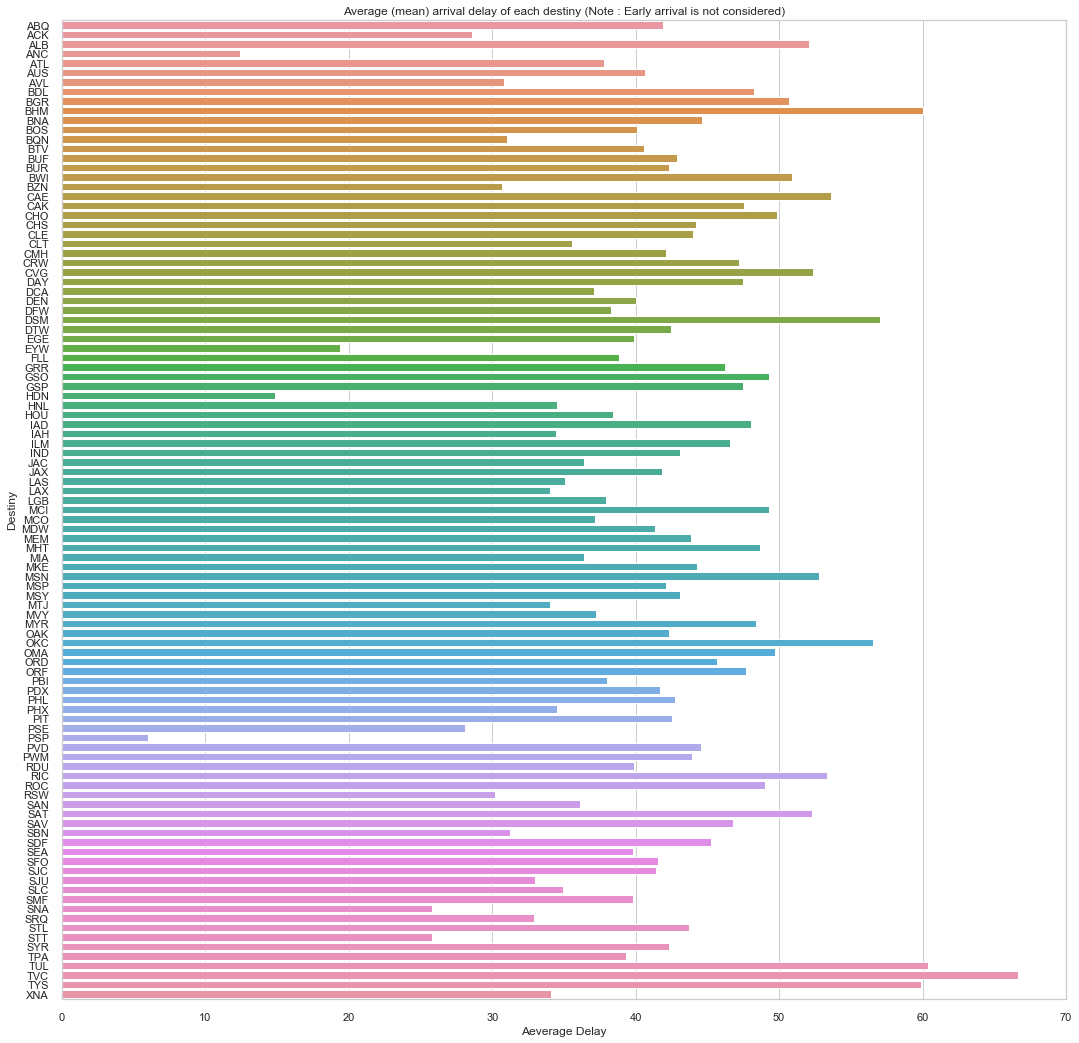

In [274]:
# Average arrival delay from each destiny (Early arrival is not considered)

f1 = (processedData_dropedNA['arr_delay'] > 0)
DelayedArrivalData = processedData_dropedNA[f1]
MeanArrivalDelayOfEachDestiny = DelayedArrivalData.groupby('dest')['arr_delay'].mean().reset_index(name='arr_delay')  

plt.figure(figsize=(18,18))
ax = sns.barplot(x='arr_delay', y='dest', data=MeanArrivalDelayOfEachDestiny)
ax.set_xlabel('dest')
plt.xlabel('Aeverage Delay')
plt.ylabel('Destiny')
plt.title('Average (mean) arrival delay of each destiny (Note : Early arrival is not considered)')

In [275]:
# Number of destiny
print(len(MeanArrivalDelayOfEachDestiny))

103


In [276]:
# Top 10 destiny with respect to number of flights 
DestinyWiseFlightCount_Top10 = processedData_dropedNA.groupby('dest')['origin'].count().nlargest(10).reset_index(name='FlightsCount')
DestinyWiseFlightCount_Top10

,dest,FlightsCount
0,ATL,16837
1,ORD,16566
2,LAX,16026
3,BOS,15022
4,MCO,13967
5,CLT,13674
6,SFO,13173
7,FLL,11897
8,MIA,11593
9,DCA,9111


Text(0.5, 1.0, 'Top 10 destinations')

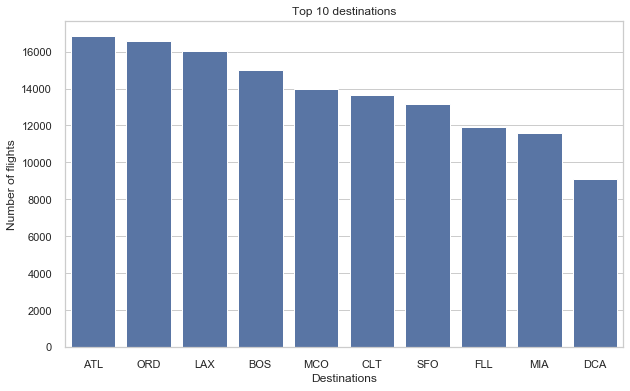

In [277]:
# Top 10 destiny with respect to number of flights 
plt.figure(figsize=(10,6))
ax = sns.barplot(x='dest', y='FlightsCount', data=DestinyWiseFlightCount_Top10, color='b')
plt.xlabel('Destinations')
plt.ylabel('Number of flights')
plt.title('Top 10 destinations')

In [278]:
# Flight speed analysis
TimeTakenInHours = processedData_dropedNA['air_time'] / 60
SpeedOfFlight = (processedData_dropedNA['distance'] / TimeTakenInHours)  
processedData_dropedNA = pd.concat([processedData_dropedNA, SpeedOfFlight.rename("speed")], axis=1)

print(len(TimeTakenInHours))
print(len(SpeedOfFlight))
processedData_dropedNA

327346
327346


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,speed
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00,370.044053
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00,374.273128
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00,408.375000
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00,516.721311
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00,394.137931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,1816,N354JB,JFK,SYR,41.0,209,22,45,30-09-2013 22:00,305.853659
336766,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,2002,N281JB,JFK,BUF,52.0,301,22,50,30-09-2013 22:00,347.307692
336767,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,486,N346JB,JFK,ROC,47.0,264,22,46,30-09-2013 22:00,337.021277
336768,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,718,N565JB,JFK,BOS,33.0,187,22,55,30-09-2013 22:00,340.000000


Text(0.5, 1.0, 'Average speed of each carrier')

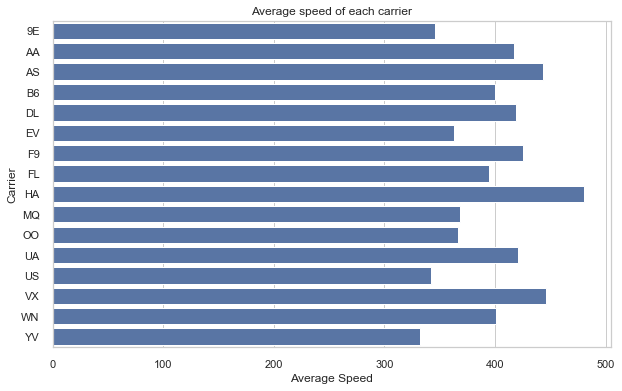

In [279]:
# Average speed of each carrier
AverageSpeedOfEachFlight = processedData_dropedNA.groupby('carrier')['speed'].mean().reset_index(name='avg_speed')  
plt.figure(figsize=(10,6))
ax = sns.barplot(x='avg_speed', y='carrier', data=AverageSpeedOfEachFlight, color='b')
plt.xlabel('Average Speed')
plt.ylabel('Carrier')
plt.title('Average speed of each carrier')

Text(0.5, 1.0, 'Arrival Outliers of each airport')

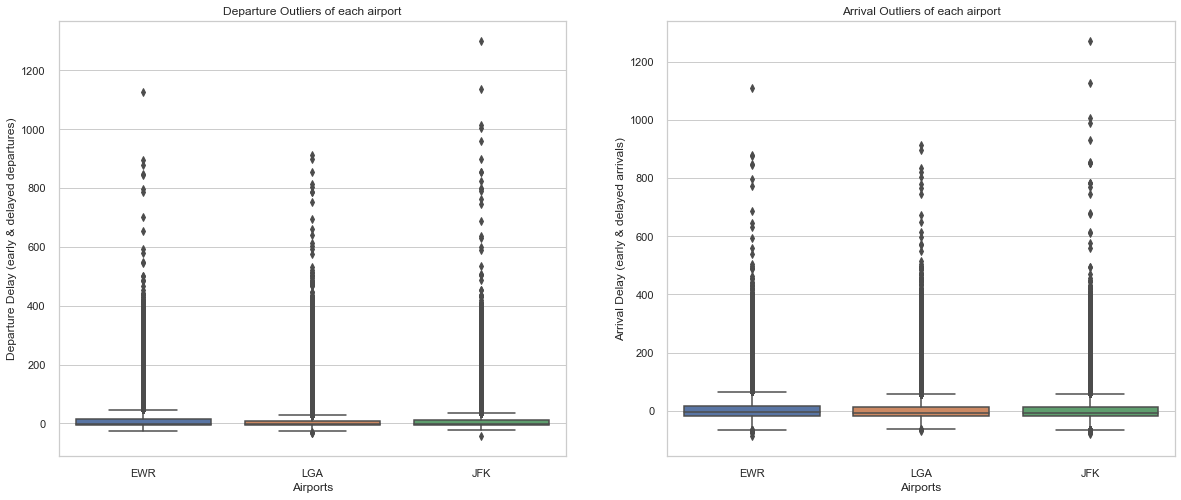

In [280]:
# Arrival Outliers of each airport
plt.figure(figsize=(20,8))

plt.subplot(121)
sns.boxplot(x='origin', y = 'dep_delay', data = processedData_dropedNA[processedData_dropedNA['dep_delay'] != 0 ])
plt.xlabel('Airports')
plt.ylabel('Departure Delay (early & delayed departures)')
plt.title('Departure Outliers of each airport')

plt.subplot(122)
sns.boxplot(x='origin', y = 'arr_delay', data = processedData_dropedNA[processedData_dropedNA['arr_delay'] != 0 ])
plt.xlabel('Airports')
plt.ylabel('Arrival Delay (early & delayed arrivals)')
plt.title('Arrival Outliers of each airport')

In [281]:
# Run profiling on data set
#report = pp.ProfileReport(processedData_dropedNA)
#report.to_file("flight_rawdata.html")